In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

In [60]:
q1_sql = """select * from gp24.student"""

In [61]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,s1@dukes.jmu.edu,s1,IA
1,s3@dukes.jmu.edu,s3,Poli. Sci
2,s4@dukes.jmu.edu,s4,IA
3,s5@dukes.jmu.edu,s5,IA
4,s2@dukes.jmu.edu,s2,IA
5,s9@dukes.jmu.edu,s9,IA


In [53]:
q2_sql = """
        select gp24.professor.p_name,
        gp24.course.c_name
        from gp24.professor
        inner join gp24.course
        on gp24.professor.p_email=gp24.course.p_email"""
        

In [54]:

df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,Futures Analysis
1,Stephen Marrin,Seminar on IA
2,Xuebin Wei,Data Mining
3,Dr. Moore,IA Course


In [57]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp24.enroll_list
        group by c_number
        """

In [58]:

df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,IA340,2
1,IA300,1
2,IA313,2


<AxesSubplot:xlabel='c_number'>

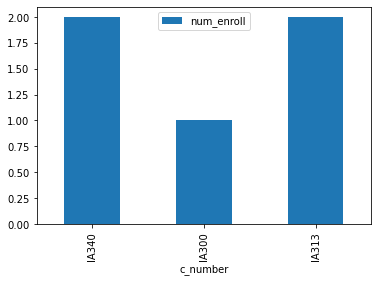

In [59]:
df.plot.bar(x='c_number',y='num_enroll')

In [14]:
q4_sql = """
        select gp24.professor.p_name,
        count(gp24.course.c_name) as num_course
        from gp24.professor
        inner join gp24.course
        on gp24.professor.p_email = gp24.course.p_email
        group by gp24.professor.p_name
        """

In [15]:

df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Noel Hendrickson,1
1,new_p,2
2,Stephen Marrin,1


<AxesSubplot:xlabel='p_name'>

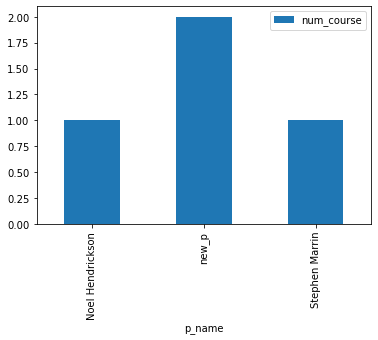

In [16]:
df.plot.bar(x='p_name',y='num_course')

In [23]:
q5_insert_professor_sql = """
            insert into gp24.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_professor_email','new_professor_name','new_professor_o')
print(q5_insert_professor_sql)


            insert into gp24.professor(p_email,p_name,p_office)
            values('new_professor_email','new_professor_name','new_professor_o')
            


In [25]:
cur.execute(q5_insert_professor_sql)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [26]:
# conn.rollback() #if error, rollback

In [27]:
conn.commit() # no error. commit

In [28]:
df=pandas.read_sql_query('select * from gp24.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,hendrix@jmu.edu,Noel Hendrickson,ISAT317
2,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
3,pemail@jmu.edu,Dr. Phil,ISAT123
4,new_p@jmu.edu,new_p,new_office
5,new_p1@jmu.edu,new_p1,new1_o


In [31]:
q5pt2_insert_course_sql = """
            insert into gp24.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_c_number','new_c_name','new_c_room','new_p_email')
print(q5pt2_insert_course_sql)


            insert into gp24.course(c_number,c_name,c_room,p_email)
            values('new_c_number','new_c_name','new_c_room','new_p_email')
            


In [32]:
cur.execute(q5pt2_insert_course_sql)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [33]:
conn.commit() # no error. commit

In [35]:
df=pandas.read_sql_query('select * from gp24.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Futures Analysis,EnGeo 1204,hendrix@jmu.edu
1,IA300,Seminar on IA,EnGeo 0150,marrinsp@jmu.edu
2,IA_New,New_c_name,Online,new_p@jmu.edu
3,IA340,Data Mining,EnGeo 2010,new_p@jmu.edu


In [36]:
q6_delete_professor_sql = """
                            delete from gp24.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [37]:
cur.execute(q6_delete_professor_sql)

In [38]:
conn.commit() # no error. commit

In [40]:
df=pandas.read_sql_query('select * from gp24.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,hendrix@jmu.edu,Noel Hendrickson,ISAT317
2,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
3,pemail@jmu.edu,Dr. Phil,ISAT123
4,new_p@jmu.edu,new_p,new_office
5,new_p1@jmu.edu,new_p1,new1_o


In [41]:
cur.close()

In [ ]:
conn.close()